In [25]:
import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [12]:
input = layers.Input(shape=(28, 28, 1))

# Encoder
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(input)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D((2, 2), padding="same")(x)

# Decoder
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(1, (3, 3), activation="sigmoid", padding="same")(x)

# Autoencoder
autoencoder = Model(input, x)
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 32)        9248      
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 28, 28, 32)       

In [13]:
def preprocess(array):
    """
    Normalizes the supplied array and reshapes it into the appropriate format.
    """

    array = array.astype("float32") / 255.0
    array = np.reshape(array, (len(array), 28, 28, 1))
    return array


def noise(array):
    """
    Adds random noise to each image in the supplied array.
    """

    noise_factor = 0.4
    noisy_array = array + noise_factor * np.random.normal(
        loc=0.0, scale=1.0, size=array.shape
    )

    return np.clip(noisy_array, 0.0, 1.0)


def display(array1, array2):
    """
    Displays ten random images from each one of the supplied arrays.
    """

    n = 10

    indices = np.random.randint(len(array1), size=n)
    images1 = array1[indices, :]
    images2 = array2[indices, :]

    plt.figure(figsize=(20, 4))
    for i, (image1, image2) in enumerate(zip(images1, images2)):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(image1.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(image2.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()

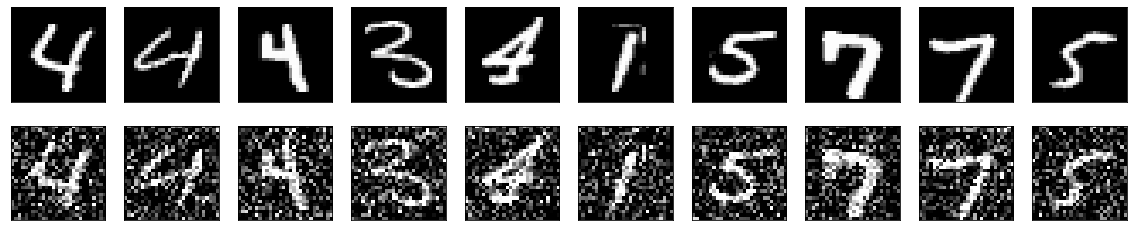

In [15]:
# Download the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize and reshape the data
x_train = preprocess(x_train)
x_test = preprocess(x_test)

# Create a copy of the data with added noise
noisy_x_train = noise(x_train)
noisy_x_test = noise(x_test)

# Display the train data and a version of it with added noise
display(x_train, noisy_x_train)

In [17]:
# train the autoencoder and save the history for the future plotting
history = autoencoder.fit(
    x=noisy_x_train,
    y=x_train,
    epochs=100,
    batch_size=128,
    shuffle=True,
    validation_data=(noisy_x_test, x_test),
)

Epoch 1/100
469/469 [==============================] - 88s 187ms/step - loss: 0.0851 - val_loss: 0.0848
Epoch 2/100
469/469 [==============================] - 94s 201ms/step - loss: 0.0851 - val_loss: 0.0846
Epoch 3/100
469/469 [==============================] - 85s 181ms/step - loss: 0.0851 - val_loss: 0.0847
Epoch 4/100
469/469 [==============================] - 85s 181ms/step - loss: 0.0850 - val_loss: 0.0849
Epoch 5/100
469/469 [==============================] - 87s 186ms/step - loss: 0.0849 - val_loss: 0.0846
Epoch 6/100
469/469 [==============================] - 106s 226ms/step - loss: 0.0849 - val_loss: 0.0846
Epoch 7/100
469/469 [==============================] - 84s 179ms/step - loss: 0.0849 - val_loss: 0.0846
Epoch 8/100
469/469 [==============================] - 89s 190ms/step - loss: 0.0849 - val_loss: 0.0845
Epoch 9/100
469/469 [==============================] - 87s 187ms/step - loss: 0.0848 - val_loss: 0.0845
Epoch 10/100
469/469 [==============================] - 88s 188

469/469 [==============================] - 87s 185ms/step - loss: 0.0838 - val_loss: 0.0839
Epoch 80/100
469/469 [==============================] - 87s 185ms/step - loss: 0.0838 - val_loss: 0.0837
Epoch 81/100
469/469 [==============================] - 87s 185ms/step - loss: 0.0838 - val_loss: 0.0838
Epoch 82/100
469/469 [==============================] - 87s 185ms/step - loss: 0.0838 - val_loss: 0.0837
Epoch 83/100
469/469 [==============================] - 87s 185ms/step - loss: 0.0838 - val_loss: 0.0837
Epoch 84/100
469/469 [==============================] - 86s 184ms/step - loss: 0.0838 - val_loss: 0.0837
Epoch 85/100
469/469 [==============================] - 87s 185ms/step - loss: 0.0838 - val_loss: 0.0838
Epoch 86/100
469/469 [==============================] - 87s 185ms/step - loss: 0.0838 - val_loss: 0.0837
Epoch 87/100
469/469 [==============================] - 86s 184ms/step - loss: 0.0838 - val_loss: 0.0838
Epoch 88/100
469/469 [==============================] - 87s 185ms/st

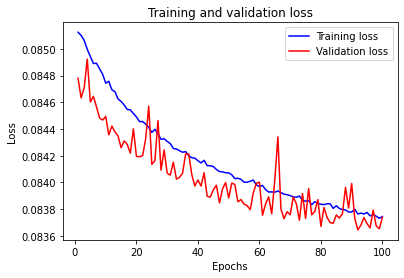

In [19]:
# plot training performance
def plot_training_loss(history):

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(loss) + 1)

    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_training_loss(history)

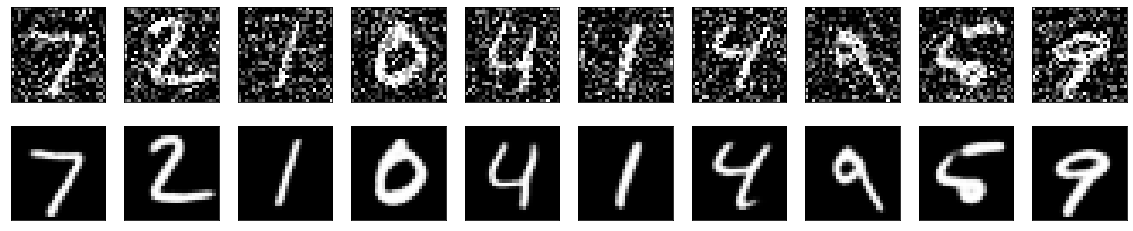

In [39]:
# show the result of autoencoder work
def plot_mnist_predict(x_test, x_test_noisy, autoencoder, y_test, labels=[]):
  
    if len(labels)>0:
        x_test = x_test[np.isin(y_test, labels)]
        x_test_noisy = x_test_noisy[np.isin(y_test, labels)]

    decoded_imgs = autoencoder.predict(x_test)
    n = 10  
    plt.figure(figsize=(20, 4))
    for i in range(n):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(x_test_noisy[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_imgs[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()
    return decoded_imgs, x_test
 
decoded_imgs_test, x_test_new = plot_mnist_predict(x_test, x_test_noisy, autoencoder, y_test)


In [23]:
# save the model
autoencoder.save('autoencoder_100epochs')

INFO:tensorflow:Assets written to: autoencoder_100epochs/assets


## Evaluation with a simple model trained on the vanila MNIST 

In [70]:
# model must be recompiled, because of the bug with evaluation metrics
eval_model = load_model('evaluation_model')
eval_model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])


(_, _), (x_test, y_test) = mnist.load_data()

x_test = preprocess(x_test)

noisy_x_test = noise(x_test)

In [72]:
# Evaluating the performance on the clean MNIST test set
eval_model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0543 - accuracy: 0.9855


[0.054269108921289444, 0.9854999780654907]

In [73]:
# Evaluating the performance on the noised MNIST test set
eval_model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 7.3642 - accuracy: 0.3882


[7.364185810089111, 0.3882000148296356]

In [74]:
# Evaluating the performance on the denoised MNIST test set
# The performance went back to the 'clean' level
decoded_x_test = autoencoder.predict(x_test)
eval_model.evaluate(decoded_x_test , y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0725 - accuracy: 0.9834


[0.07249294966459274, 0.9833999872207642]